In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("capstone_data_clean.csv")
df["Adv_Year"] = df["Adv_Year"].astype("category")
df["Adv_Month"] = df["Adv_Month"].astype("category")
df["Gearbox_Type"] = df["Gearbox_Type"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")

In [3]:
df["Price"].describe()

count    2.671050e+05
mean     1.471860e+04
std      2.591019e+04
min      1.000000e+02
25%      4.990000e+03
50%      9.299000e+03
75%      1.715000e+04
max      2.599990e+06
Name: Price, dtype: float64

In [4]:
df["Price"].mode()

0    3995.0
Name: Price, dtype: float64

Text(0, 0.5, 'Number of Observations')

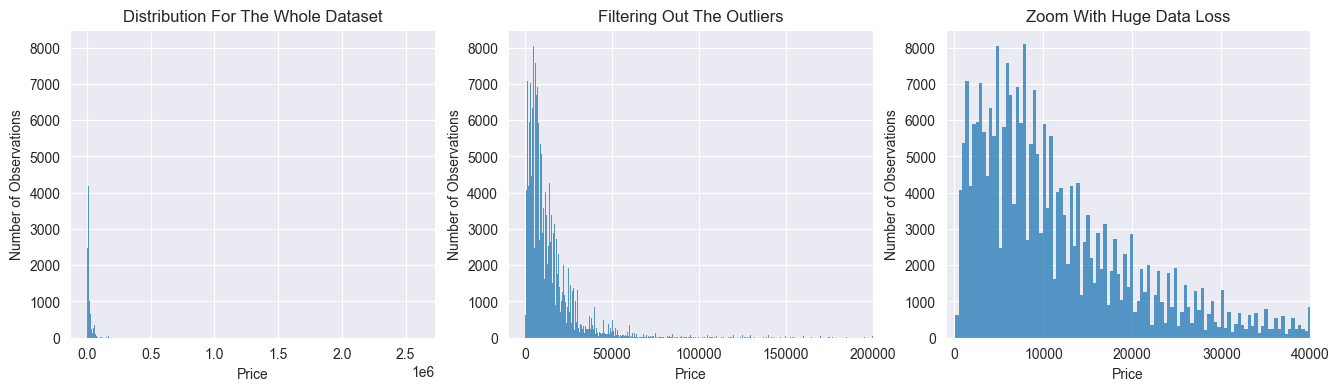

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

a = sns.histplot(df["Price"], ax=axes[0])
axes[0].set_title("Distribution for the whole dataset".title())
axes[0].set_ylabel("Number of Observations")

b = sns.histplot(df["Price"], ax=axes[1])
axes[1].set_xlim([-10000, 200000])
axes[1].set_title("Filtering out the outliers".title())
axes[1].set_ylabel("Number of Observations")

c = sns.histplot(df["Price"], ax=axes[2])
axes[2].set_xlim([-1000, 40000])
axes[2].set_title("Zoom with huge data loss".title())
axes[2].set_ylabel("Number of Observations")

In [6]:
sample = df[df["Price"] < 40000]

In [7]:
len(df) - len(sample)

15693

In [8]:
stats.normaltest(sample["Price"], nan_policy="omit")

NormaltestResult(statistic=41019.6532948694, pvalue=0.0)

### Observations to the Price variable distribution
1. Variable's distribution is highly positively skewed.
2. mode = 3995, median = 9299, and mean = 14 717
3. Values for the highest outliers exceed a million dollars.
4. No matter how many outliers I cut off, the distribution is still going to be positively skewed.

# Categoric variable's distribution and influence on Price

## Gearbox_Type

In [9]:
df["Gearbox_Type"].value_counts().reset_index()

,Gearbox_Type,count
0,Manual,170830
1,Automatic,97116
2,Semi-Automatic,137


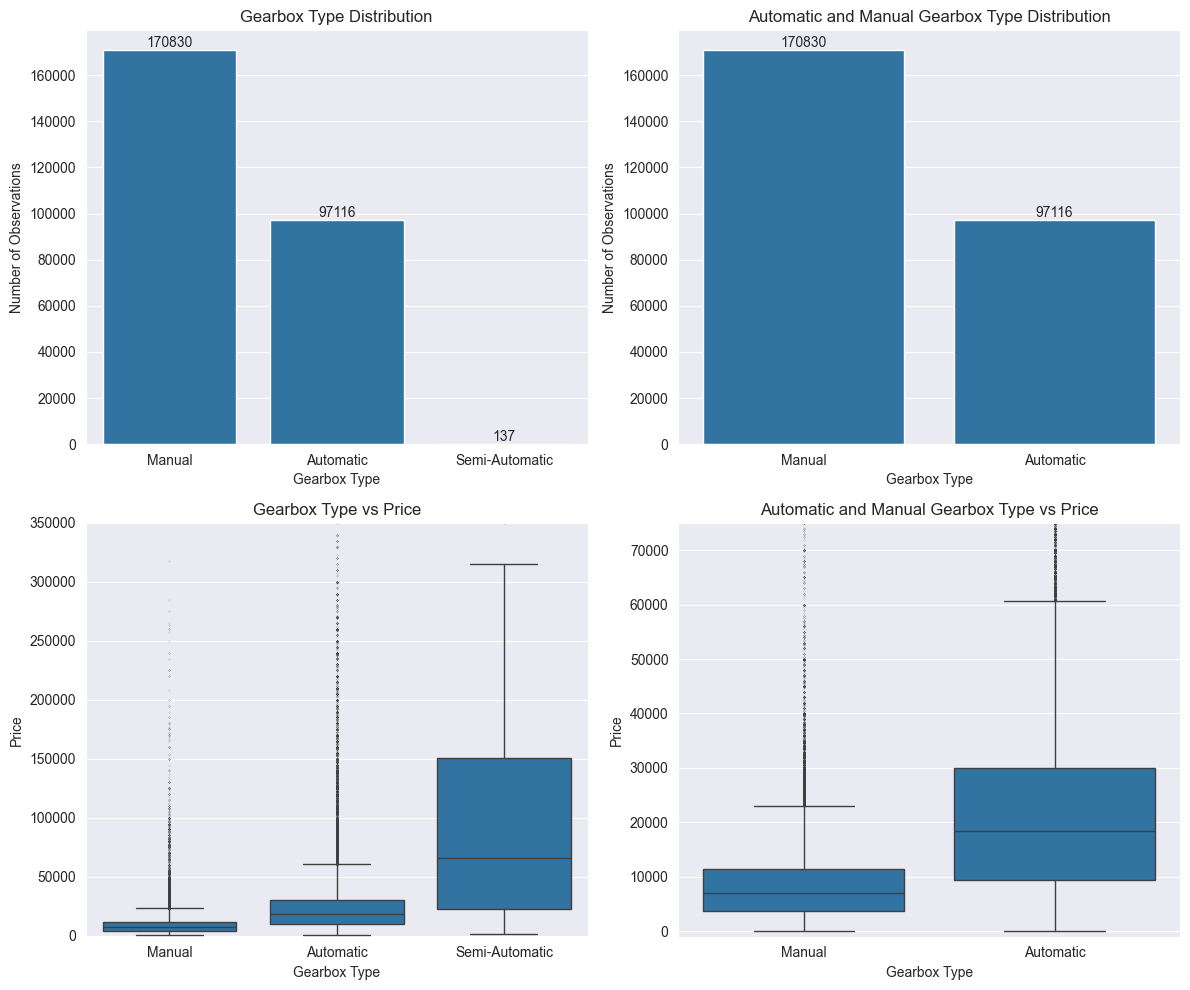

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Count plot for the whole dataset
counted = df["Gearbox_Type"].value_counts().reset_index()
a = sns.barplot(counted, x="Gearbox_Type", y="count", order=["Manual", "Automatic", "Semi-Automatic"], ax=axes[0][0])
a.bar_label(a.containers[0])
axes[0][0].set_title("Gearbox Type Distribution")
axes[0][0].set_xlabel("Gearbox Type")
axes[0][0].set_ylabel("Number of Observations")

# Gearbox Type vs price for the whole dataset
b = sns.boxplot(data=df, x="Gearbox_Type", y="Price", fliersize=0.1, order=["Manual", "Automatic", "Semi-Automatic"], ax=axes[1][0])
axes[1][0].set_ylim(-1000, 350000)
axes[1][0].set_title("Gearbox Type vs Price")
axes[1][0].set_xlabel("Gearbox Type")
axes[1][0].set_ylabel("Price")

# Count plot with semi-automatic filtered out
gb = df[df["Gearbox_Type"].isin(["Automatic", "Manual"])]
counted2 = gb["Gearbox_Type"].value_counts().reset_index()
c = sns.barplot(counted2, x="Gearbox_Type", y="count", order=["Manual", "Automatic"], ax=axes[0][1])
c.bar_label(c.containers[0])
axes[0][1].set_title("Automatic and Manual Gearbox Type Distribution")
axes[0][1].set_xlabel("Gearbox Type")
axes[0][1].set_ylabel("Number of Observations")

# Gearbox Type vs price with semi-automatic filtered out
d = sns.boxplot(data=gb, x="Gearbox_Type", y="Price", fliersize=0.1, order=["Manual", "Automatic"], ax=axes[1][1])
axes[1][1].set_ylim(-1000, 75000)
axes[1][1].set_title("Automatic and Manual Gearbox Type vs Price")
axes[1][1].set_xlabel("Gearbox Type")
axes[1][1].set_ylabel("Price")

plt.tight_layout()
plt.show()

There's roughly 100 observations of Semi-Automatic gearbox type in the dataset. Hence, the results are unreliable and hard to compare with other categories.  

## Fuel_Type

In [11]:
df["Fuel_Type"].value_counts().reset_index()

,Fuel_Type,count
0,Diesel,132792
1,Petrol,127375
2,Petrol Hybrid,4877
3,Electric,1302
4,Petrol Plug-in Hybrid,1265
5,Diesel Hybrid,155
6,Diesel Plug-in Hybrid,39
7,Bi Fuel,28
8,Petrol Ethanol,8


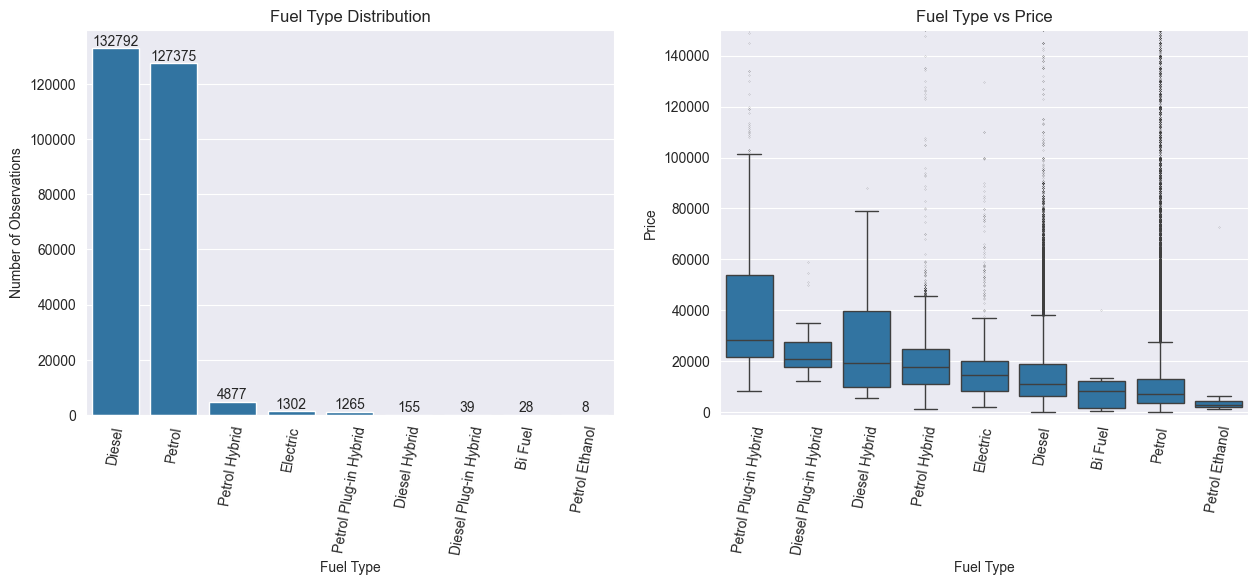

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

labels1 = df["Fuel_Type"].value_counts().index
counted = df["Fuel_Type"].value_counts().reset_index()

a = sns.barplot(counted, x="Fuel_Type", y="count", order=labels1, ax=axes[0])
a.bar_label(a.containers[0])
a.set_xticks(range(len(labels1)))
a.set_xticklabels(labels1, rotation=80)

axes[0].set_title("Fuel Type Distribution")
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("Number of Observations")

labels2 = df.groupby("Fuel_Type", observed=False)["Price"].median().sort_values(ascending=False).index
b = sns.boxplot(data=df, x="Fuel_Type", y="Price", fliersize=0.1, order=labels2, ax=axes[1])
b.set_xticks(range(len(labels2)))
b.set_xticklabels(labels2, rotation=80)

axes[1].set_ylim(-1000, 150000)
axes[1].set_title("Fuel Type vs Price")
axes[1].set_xlabel("Fuel Type")
axes[1].set_ylabel("Price")

plt.show()

## Advertisement year

In [13]:
df["Adv_Year"].value_counts().reset_index()

,Adv_Year,count
0,2018,239972
1,2021,14864
2,2017,11319
3,2020,1268
4,2016,581
5,2019,107
6,2015,105
7,2014,27
8,2013,7


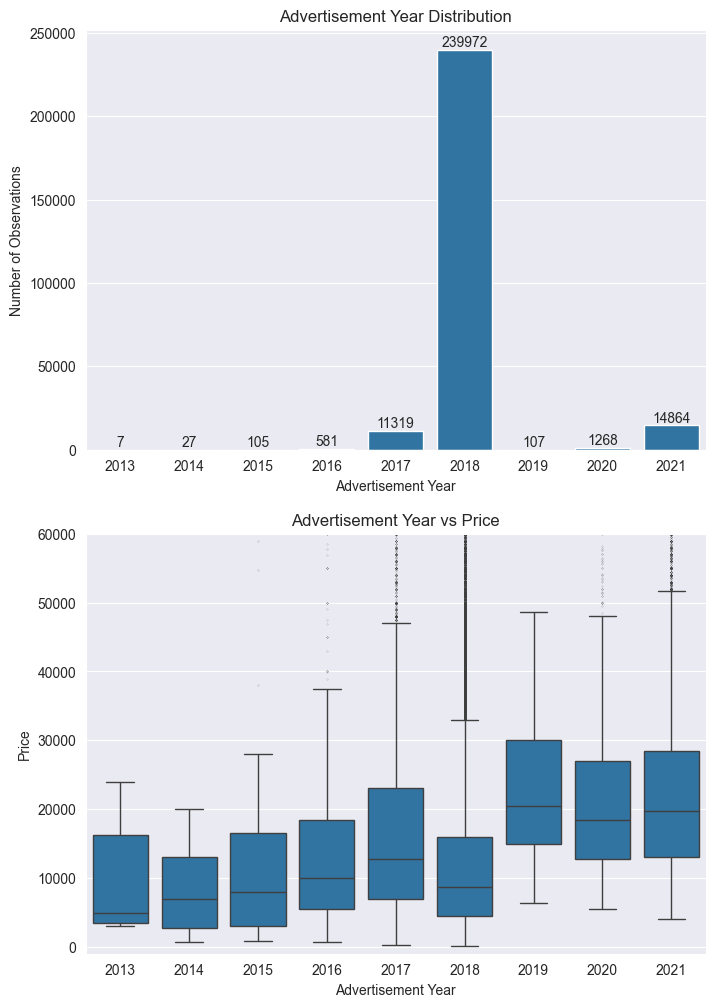

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

counted = df["Adv_Year"].value_counts().reset_index()
a = sns.barplot(counted, x="Adv_Year", y="count", ax=axes[0])
a.bar_label(a.containers[0])
axes[0].set_title("Advertisement Year Distribution")
axes[0].set_xlabel("Advertisement Year")
axes[0].set_ylabel("Number of Observations")

b = sns.boxplot(data=df, x="Adv_Year", y="Price", fliersize=0.1, ax=axes[1])
axes[1].set_ylim(-1000, 60000)
axes[1].set_title("Advertisement Year vs Price")
axes[1].set_xlabel("Advertisement Year")
axes[1].set_ylabel("Price")

plt.show()

As shown on the chart - most of the ovservations come from the 2018th.

## Advertisement month

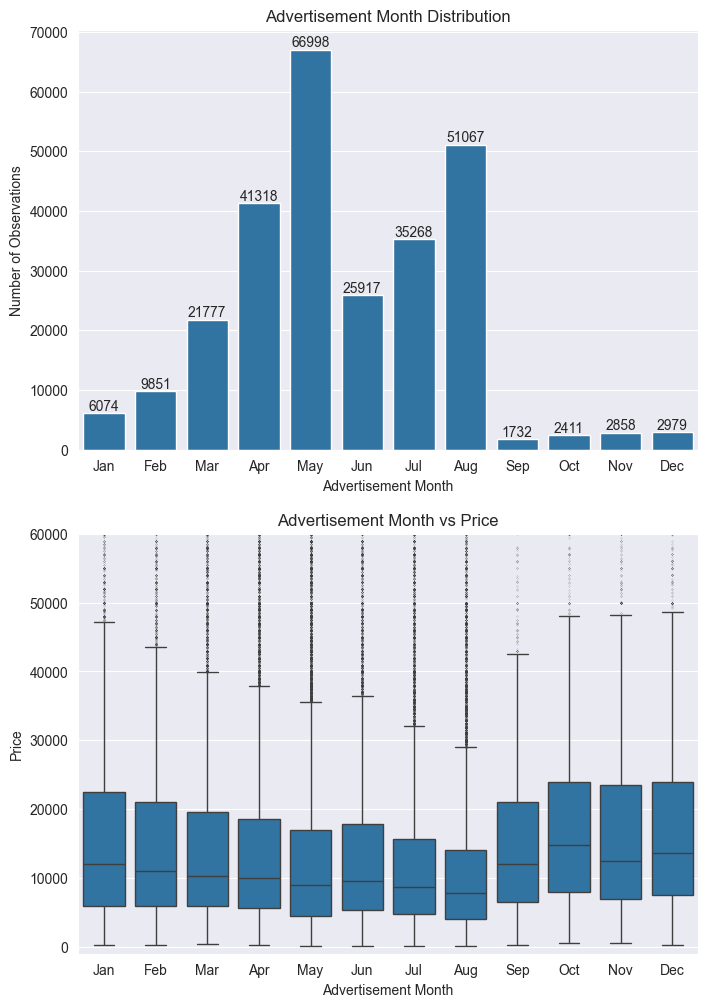

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
counted = df["Adv_Month"].value_counts().reset_index()
a = sns.barplot(counted, x="Adv_Month", y="count", order=labels, ax=axes[0])
a.bar_label(a.containers[0])
axes[0].set_title("Advertisement Month Distribution")
axes[0].set_xlabel("Advertisement Month")
axes[0].set_ylabel("Number of Observations")

b = sns.boxplot(data=df, x="Adv_Month", y="Price", fliersize=0.1, order=labels, ax=axes[1])
axes[1].set_ylim(-1000, 60000)
axes[1].set_title("Advertisement Month vs Price")
axes[1].set_xlabel("Advertisement Month")
axes[1].set_ylabel("Price")

plt.show()

In [16]:
# def months_to_num(x):
#     months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#     for i in range(len(months)):
#         if x == months[i]:
#             return i + 1

In [17]:
# times = df.copy()
# times["Adv_Month"] = times["Adv_Month"].apply(months_to_num)
# times = times.sort_values(["Adv_Year", "Adv_Month"], ascending=([True, True]))
# times

### Countplot in 2018th

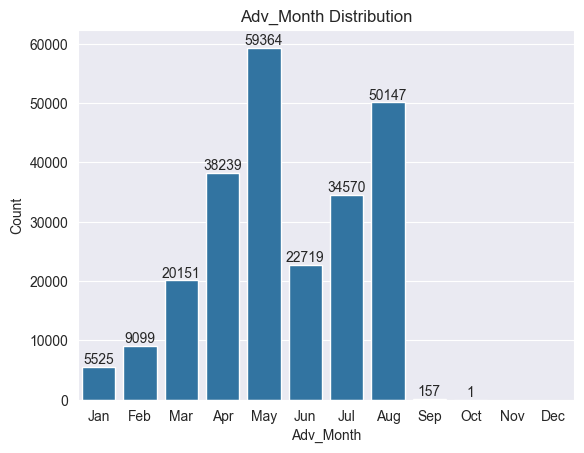

In [18]:
sample = df[df["Adv_Year"] == 2018]

plt.title("Adv_Month Distribution")
plt.xlabel("Adv_Month")
plt.ylabel("Count")
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

g = sns.countplot(sample, x="Adv_Month", order=labels)
g.bar_label(g.containers[0])

plt.show()

## Maker

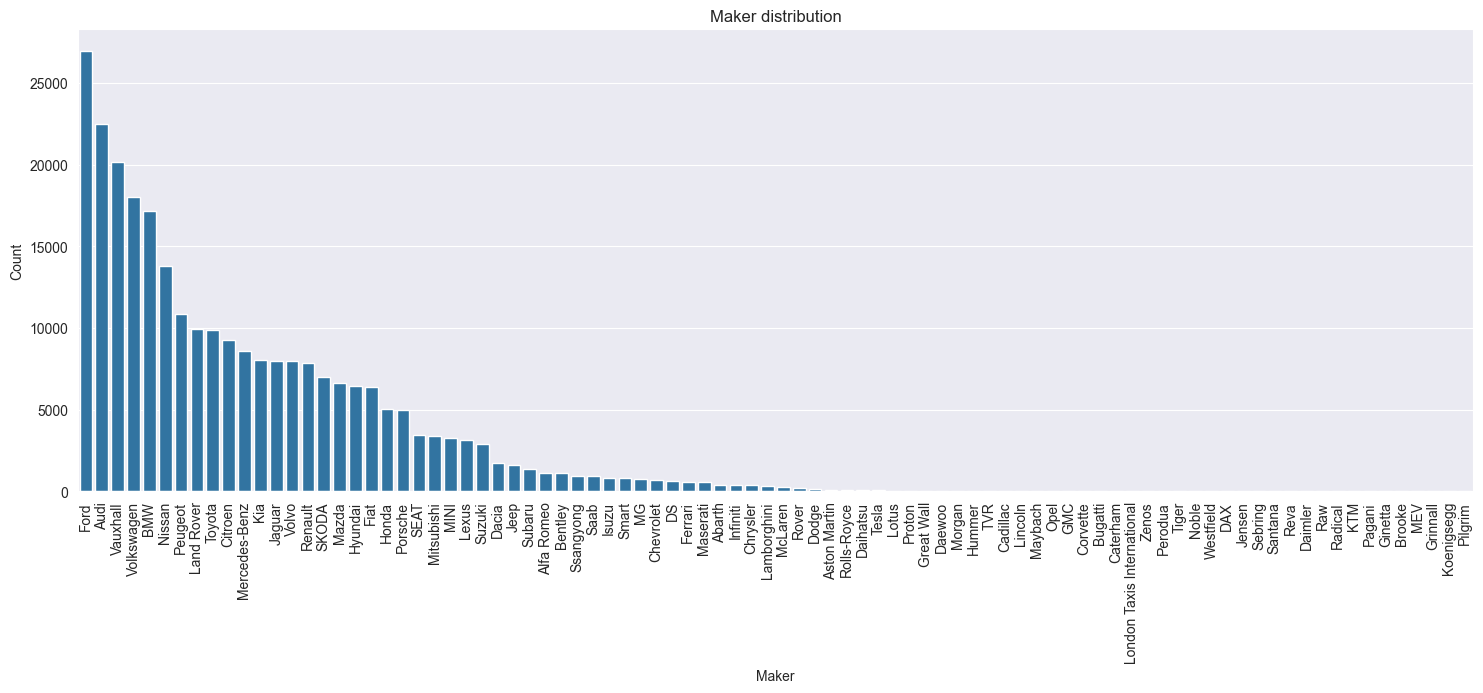

In [19]:
plt.figure(figsize=(18,6))
plt.title("Maker distribution")
plt.xlabel("Maker")
plt.ylabel("Count")

labels = df["Maker"].value_counts().index
counted = df["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

# g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

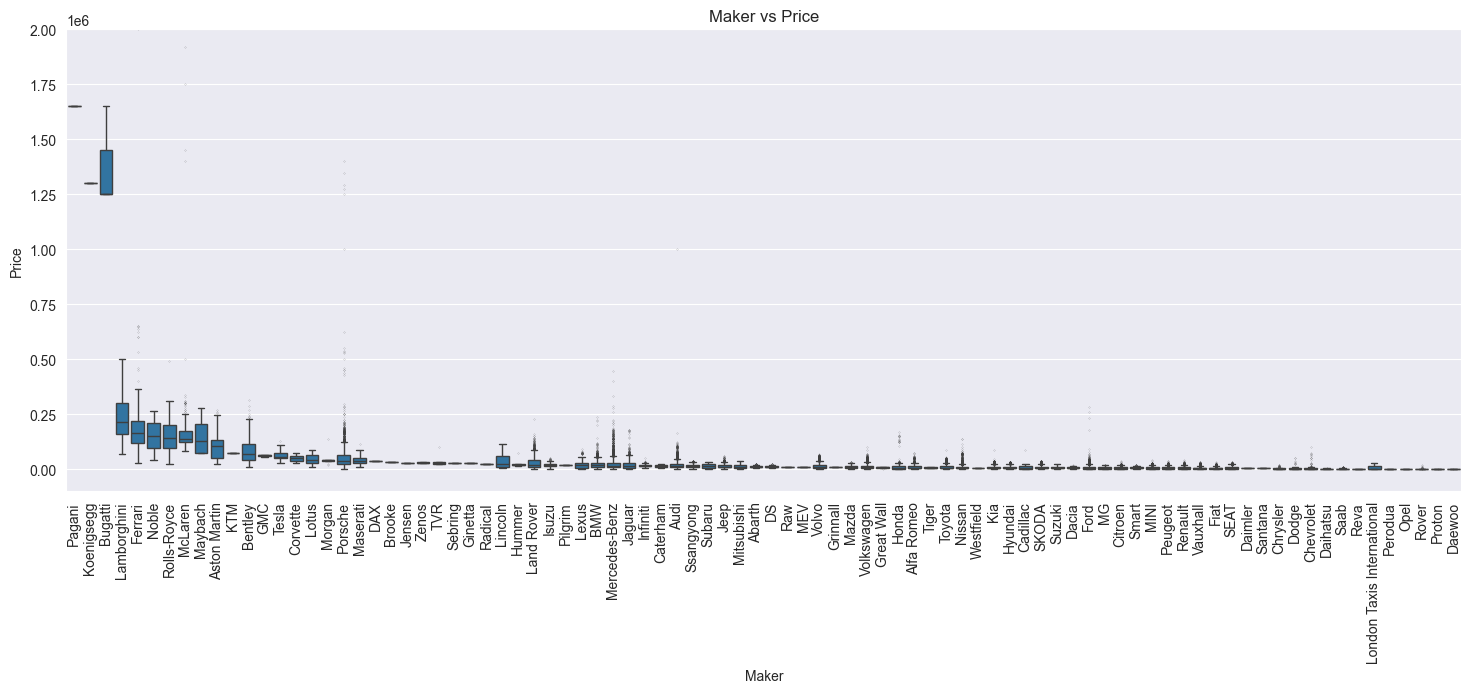

In [20]:
plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = df.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-100000, 2000000)

plt.show()

## Genmodel

In [21]:
df["Genmodel"].nunique()

896

In [22]:
df["Genmodel"].describe()

count     268250
unique       896
top        Corsa
freq        5568
Name: Genmodel, dtype: object

## Body_Type

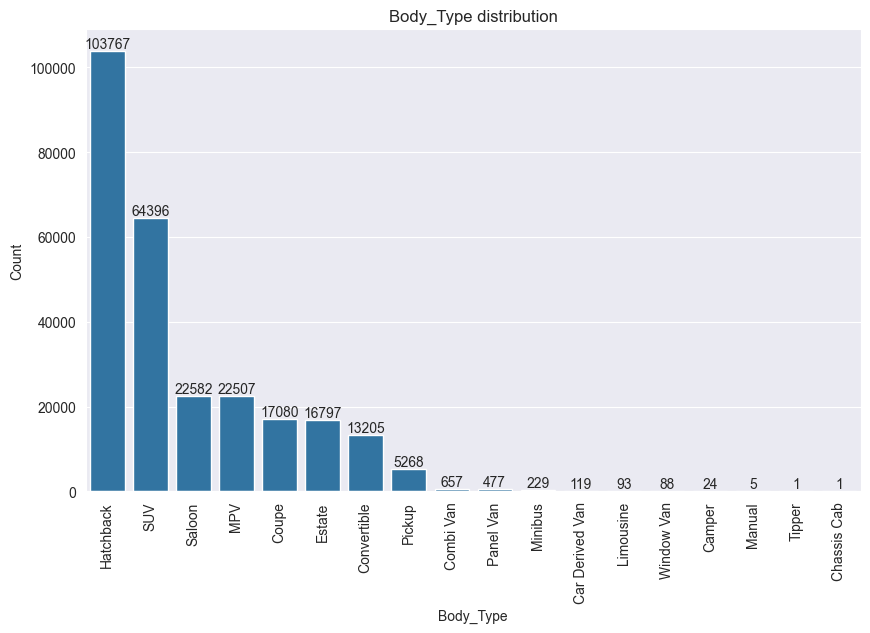

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Body_Type distribution")
plt.xlabel("Body_Type")
plt.ylabel("Count")

labels = df["Body_Type"].value_counts().index
counted = df["Body_Type"].value_counts().reset_index()

g = sns.barplot(counted, x="Body_Type", y="count", order=labels)
g.bar_label(g.containers[0])

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

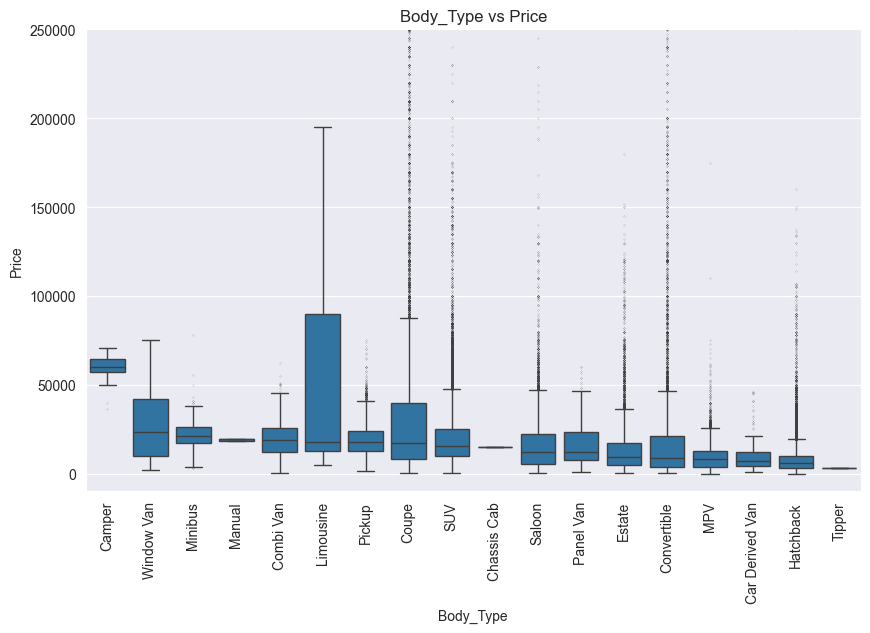

In [24]:
plt.figure(figsize=(10,6))
plt.title("Body_Type vs Price")
plt.xlabel("Body_Type")
plt.ylabel("Price")

labels = df.groupby("Body_Type")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Body_Type", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 250000)

plt.show()

### Maker

In [25]:
df["Maker"].nunique()

88

In [26]:
df["Maker"].value_counts().head(10)

Maker
Ford          26936
Audi          22521
Vauxhall      20157
Volkswagen    17999
BMW           17194
Nissan        13830
Peugeot       10882
Land Rover     9927
Toyota         9899
Citroen        9281
Name: count, dtype: int64

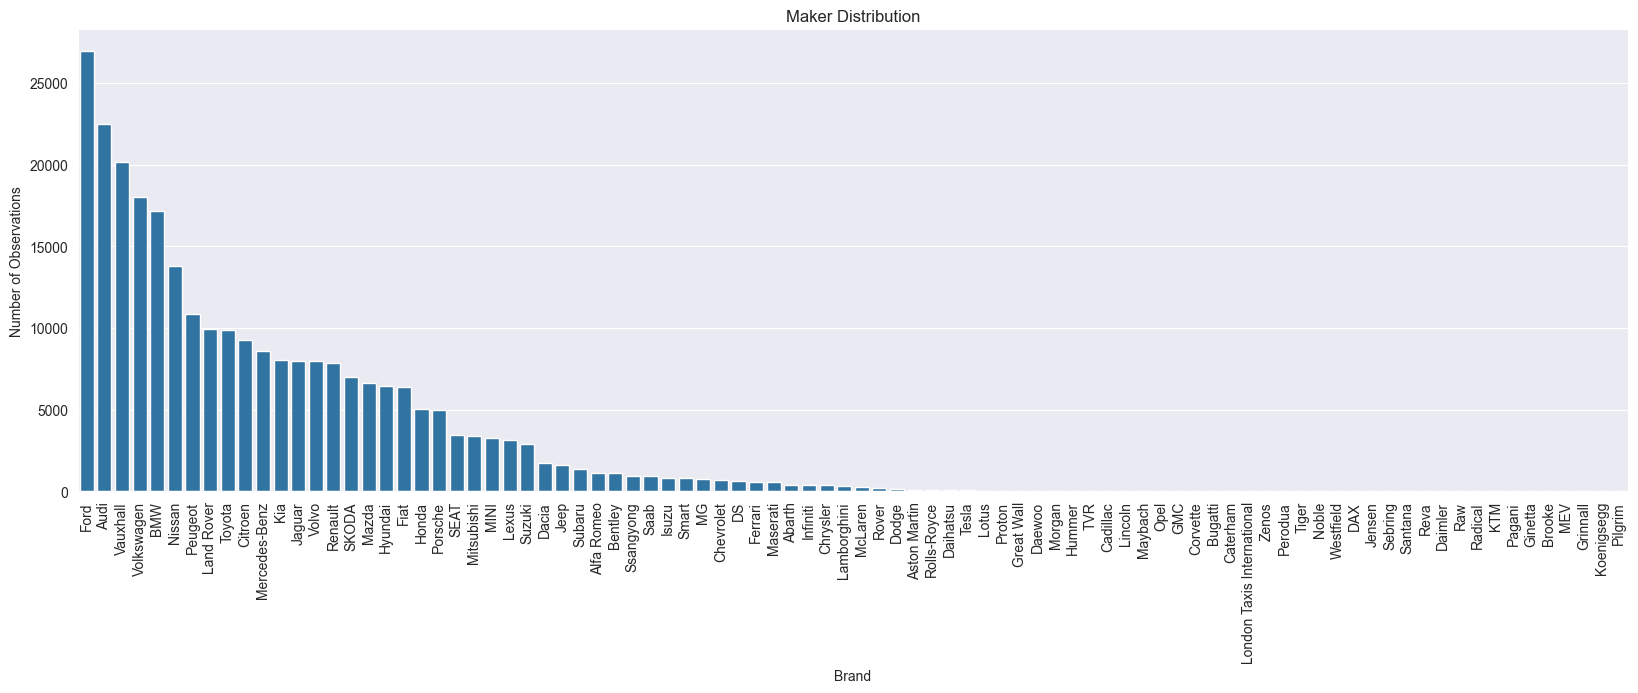

In [27]:
plt.figure(figsize=(20, 6))
plt.title("Maker Distribution")
plt.xlabel("Brand")
plt.ylabel("Number of Observations")

labels = df["Maker"].value_counts().index
counted = df["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

In [28]:
makers = df.groupby("Maker")

In [29]:
makers["Price"].mean().sort_values(ascending=False)

Maker
Pagani         1.650000e+06
Bugatti        1.383333e+06
Koenigsegg     1.300000e+06
Lamborghini    2.329342e+05
Ferrari        1.929391e+05
                   ...     
Rover          1.683533e+03
Opel           1.308750e+03
Proton         1.197391e+03
Perodua        1.055000e+03
Daewoo         8.803684e+02
Name: Price, Length: 88, dtype: float64

In [30]:
audi = makers.get_group("Audi")
audi["Genmodel"].value_counts().reset_index()

,Genmodel,count
0,A3,2010
1,Q3,1731
2,Q5,1522
3,A1,1406
4,A6 Saloon,1380
5,A4,1239
6,Q7,1156
7,TT,1135
8,A6 Avant,1022
9,A4 Avant,938


In [31]:
audi["Price"].describe()

count     22521.000000
mean      18958.661649
std       14896.917603
min         280.000000
25%        9000.000000
50%       16750.000000
75%       25000.000000
max      999999.000000
Name: Price, dtype: float64

In [32]:
audi["Price"].mode()

0    9995.0
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

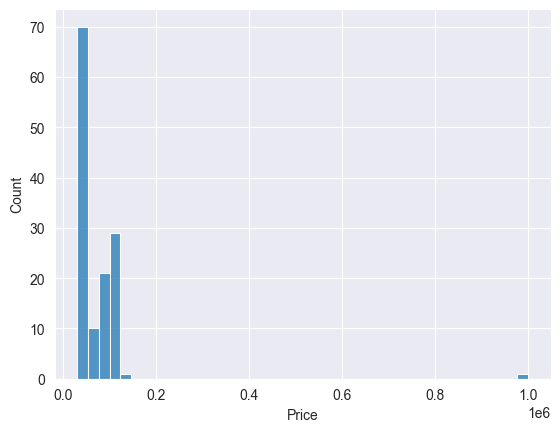

In [33]:
r8 = audi[audi["Genmodel"] == "R8"]
sns.histplot(r8, x="Price")

In [34]:
audi[audi["Price"] == 999999]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
170055,Audi,R8,7_23,7_23_46,2017,Sep,Grey,Coupe,Automatic,Petrol,...,602.0,555.0,2650.0,1240.0,2037.0,4426.0,23.0,205.0,2.0,2.0


In [35]:
audi = audi.drop(audi[audi["Price"] == 999999].index)

<Axes: xlabel='Price', ylabel='Count'>

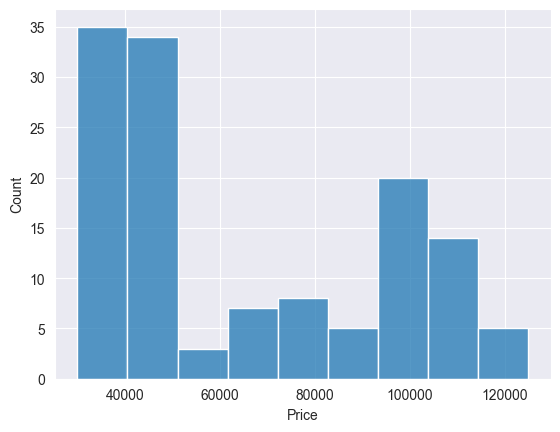

In [36]:
r8 = audi[audi["Genmodel"] == "R8"]
sns.histplot(r8, x="Price")

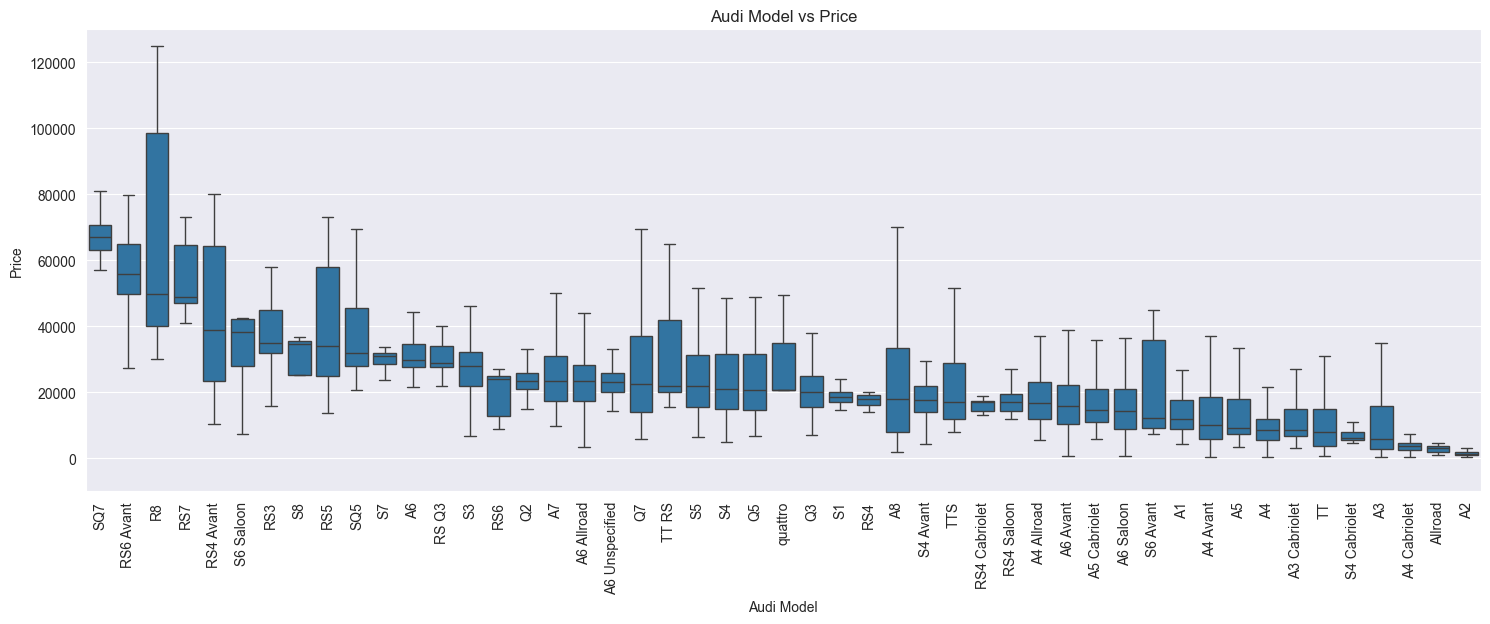

In [37]:
plt.figure(figsize=(18, 6))
plt.title("Audi Model vs Price")
plt.xlabel("Audi Model")
plt.ylabel("Price")

labels = audi.groupby("Genmodel")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(audi, x="Genmodel", y="Price", fliersize=0, order=labels)
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.ylim(-10000, 130000)
plt.show()

In [38]:
ford = makers.get_group("Ford")
ford["Price"].describe()

count     26936.000000
mean       8748.522498
std        7736.725663
min         100.000000
25%        3250.000000
50%        7480.000000
75%       12000.000000
max      284990.000000
Name: Price, dtype: float64

In [39]:
ford['Price'].mode()

0    995.0
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

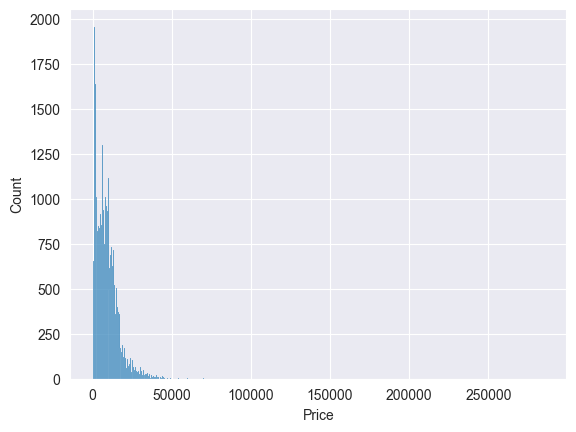

In [40]:
sns.histplot(ford['Price'])

In [41]:
ford[ford['Price'] > 100000]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
35534,Ford,GT,29_22,29_22_1,2018,Mar,Silver,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
35535,Ford,GT,29_22,29_22_2,2018,Feb,Silver,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
35536,Ford,GT,29_22,29_22_3,2018,Apr,Red,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35537,Ford,GT,29_22,29_22_4,2018,Mar,Red,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [42]:
ford[ford['Price'] <= 500]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
22162,Ford,Fiesta,29_13,29_13_37,2018,Jul,Silver,Hatchback,Manual,Petrol,...,74.0,155.0,2486.0,1468.0,1683.0,3917.0,45.6,101.0,5.0,3.0
22176,Ford,Fiesta,29_13,29_13_51,2018,Jul,Red,Hatchback,Manual,Petrol,...,59.0,230.0,2446.0,1320.0,1793.0,3828.0,38.7,95.0,5.0,3.0
22191,Ford,Fiesta,29_13,29_13_66,2018,Aug,Blue,Hatchback,Manual,Petrol,...,74.0,195.0,2446.0,1320.0,1793.0,3828.0,40.9,104.0,5.0,3.0
22229,Ford,Fiesta,29_13,29_13_104,2018,May,Red,Hatchback,Manual,Petrol,...,59.0,230.0,2446.0,1320.0,1793.0,3828.0,38.7,95.0,5.0,5.0
22300,Ford,Fiesta,29_13,29_13_175,2018,Aug,Silver,Hatchback,Manual,Diesel,...,67.0,30.0,2486.0,1463.0,1683.0,3917.0,64.2,102.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44442,Ford,Puma,29_29,29_29_6,2018,Jan,Red,Coupe,Manual,Petrol,...,123.0,250.0,2446.0,1344.0,1837.0,3984.0,38.2,126.0,4.0,3.0
46494,Ford,Streetka,29_32,29_32_9,2018,Aug,Blue,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,35.8,108.0,2.0,2.0
46513,Ford,Streetka,29_32,29_32_28,2018,Aug,Red,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,35.8,108.0,2.0,2.0
46535,Ford,Streetka,29_32,29_32_50,2018,Aug,Silver,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,35.8,108.0,2.0,2.0


## Color 

I'd think it shouldn't be so important, but according to the statistical tests it significantly influence prices.

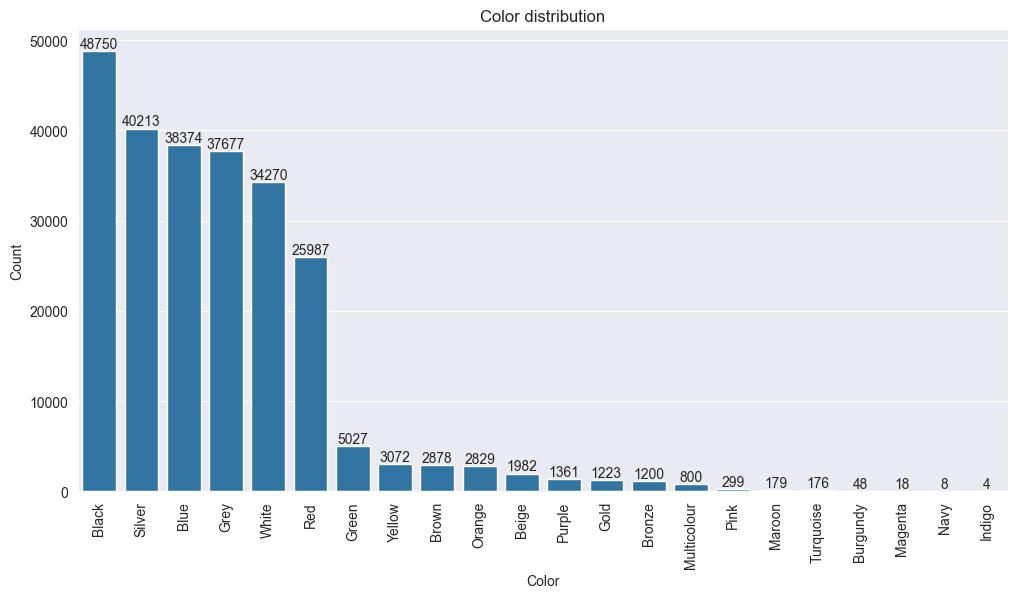

In [43]:
plt.figure(figsize=(12, 6))
plt.title("Color distribution")
plt.xlabel("Color")
plt.ylabel("Count")

labels = df["Color"].value_counts().index
counted = df["Color"].value_counts().reset_index()

g = sns.barplot(counted, x="Color", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

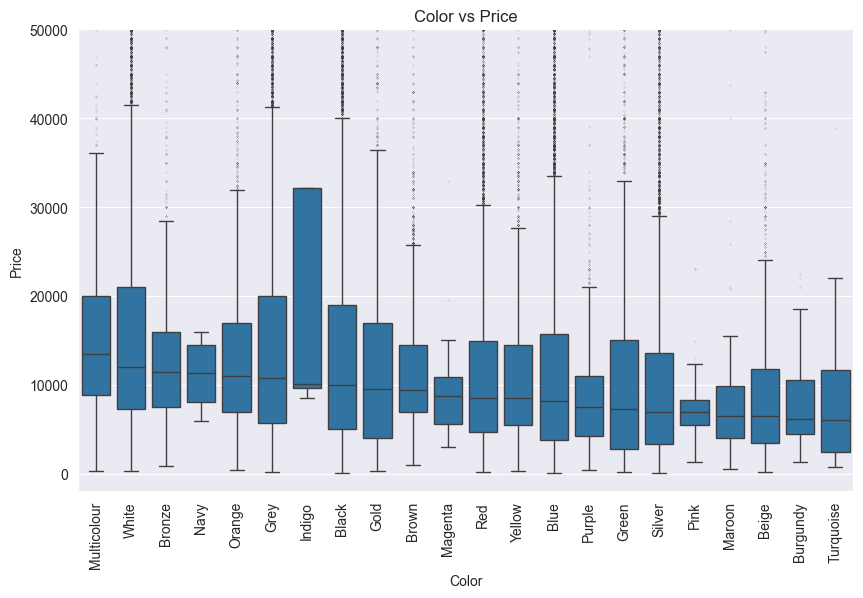

In [44]:
plt.figure(figsize=(10,6))
plt.title("Color vs Price")
plt.xlabel("Color")
plt.ylabel("Price")

labels = df.groupby("Color")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Color", y="Price", fliersize=0.1, order=labels)
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-2000, 50000)

plt.show()

# Numeric variables

## Length

<Axes: xlabel='Length', ylabel='Price'>

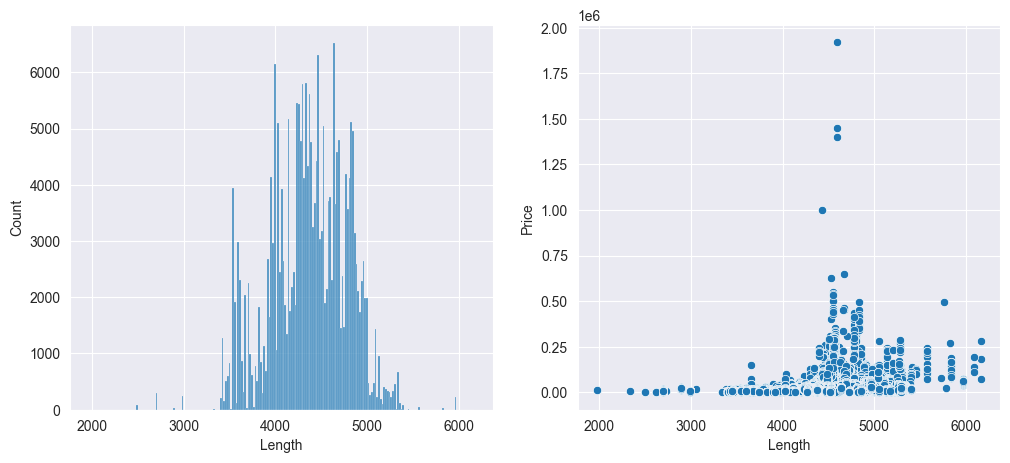

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(df, x="Length", ax=axes[0])
sns.scatterplot(data=df, x="Length", y="Price", ax=axes[1])

In [46]:
df["Length"].skew()

-0.30280959361472565

In [47]:
stats.normaltest(df["Length"], nan_policy="omit")

NormaltestResult(statistic=3697.2539149192226, pvalue=0.0)

## Height

<Axes: xlabel='Height', ylabel='Price'>

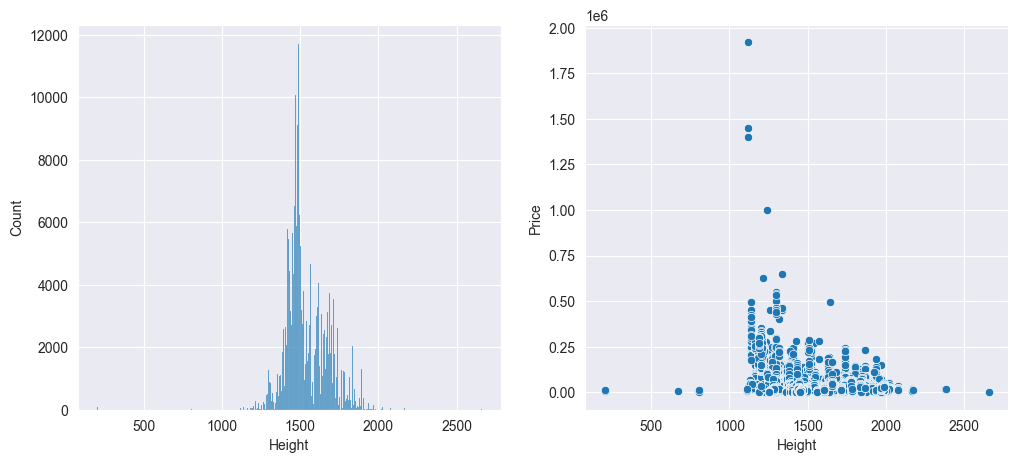

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(df, x="Height", ax=axes[0])
sns.scatterplot(data=df, x="Height", y="Price", ax=axes[1])

In [49]:
stats.normaltest(df["Height"], nan_policy="omit")

NormaltestResult(statistic=28703.595464416903, pvalue=0.0)

## Width

<Axes: xlabel='Width', ylabel='Price'>

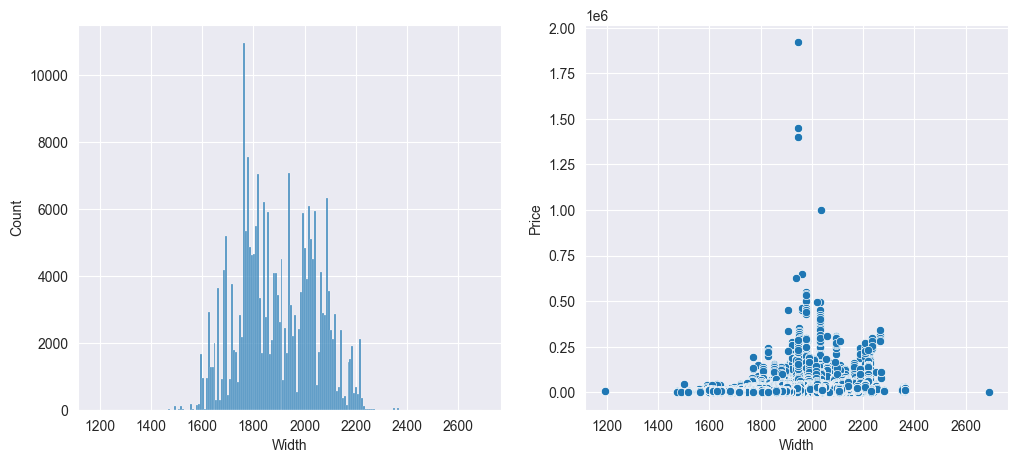

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(df, x="Width", ax=axes[0])
sns.scatterplot(data=df, x="Width", y="Price", ax=axes[1])

## Wheelbase

<Axes: xlabel='Wheelbase', ylabel='Price'>

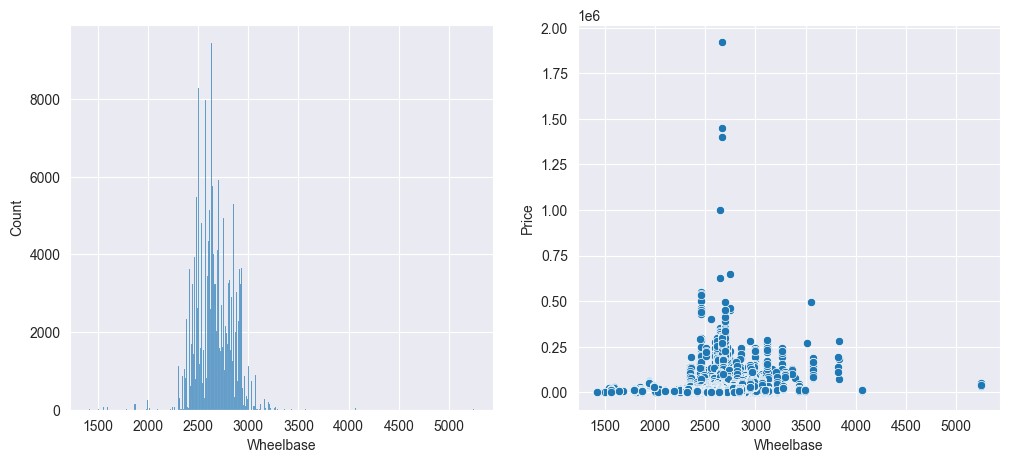

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(df, x="Wheelbase", ax=axes[0])
sns.scatterplot(data=df, x="Wheelbase", y="Price", ax=axes[1])